# Sales order data exploration

Use the code in this notebook to explore sales order data.

**Cargar datos > Spark.**

In [1]:
df = spark.read.format("csv").option("header","true").load("Files/orders/2019.csv")
# df now is a Spark DataFrame containing CSV data from "Files/orders/2019.csv".
display(df)

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, a814c6fa-2a98-4f8d-a0bd-4698474ffb8a)

**establecer la opción de encabezado en false**

In [2]:
df = spark.read.format("csv").option("header","false").load("Files/orders/2019.csv")
# df now is a Spark DataFrame containing CSV data from "Files/orders/2019.csv".
display(df)

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, ead66c15-4aeb-4bd9-801c-8758275ab5f7)

**definir un esquema y aplicarlo al cargar los datos**

In [3]:
from pyspark.sql.types import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
    ])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/2019.csv")
display(df)

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, dc0b07d1-9319-4f9b-9d1e-d514eb4ee293)

****Confirme que los cambios se han aplicado a los datos visualizando el marco de datos.****

In [4]:
display(df)

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 6, Finished, Available)

SynapseWidget(Synapse.DataFrame, df612e9c-5634-45f6-965d-b0f709c7b962)

**El marco de datos incluye solo los datos del archivo .csv 2019. Modifique el código para que la ruta de acceso del archivo use un comodín * para leer los datos del pedido de ventas de todos los archivos de la carpeta de pedidos**

In [5]:
from pyspark.sql.types import *

orderSchema = StructType([
   StructField("SalesOrderNumber", StringType()),
   StructField("SalesOrderLineNumber", IntegerType()),
   StructField("OrderDate", DateType()),
   StructField("CustomerName", StringType()),
   StructField("Email", StringType()),
   StructField("Item", StringType()),
   StructField("Quantity", IntegerType()),
   StructField("UnitPrice", FloatType()),
   StructField("Tax", FloatType())
   ])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/*.csv")
display(df)

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 7, Finished, Available)

SynapseWidget(Synapse.DataFrame, 5af311a2-5f99-4e1d-9462-a741febc1af0)

**<mark>Ejecute la celda de código modificada y revise el resultado, que ahora debería incluir las ventas de 2019, 2020 y 2021.</mark>**

# Exploración de datos en un marco de datos

**Filtrar un marco de datos**

In [6]:
customers = df['CustomerName', 'Email']
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 8, Finished, Available)

32718
12427


SynapseWidget(Synapse.DataFrame, 721f0e38-ae9e-4cac-88cb-c9bd6d85127e)

- Cuando se realiza una operación en un marco de datos, el resultado es un nuevo marco de datos (en este caso, se crea un nuevo marco de datos de clientes seleccionando un subconjunto específico de columnas del marco de datos df)

- Las tramas de datos proporcionan funciones como count y distinct que se pueden utilizar para resumir y filtrar los datos que contienen.

- La sintaxis es una forma abreviada de definir un subconjunto de columnas. También puede usar el método select, por lo que la primera línea del código anterior podría escribirse como:
```
 dataframe['Field1', 'Field2', ...]customers = df.select("CustomerName", "Email")
```

<u>Modifique el código de la siguiente manera para ver los clientes que han comprado el producto Road-250 Red, 52. </u>

In [7]:
customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 9, Finished, Available)

133
133


SynapseWidget(Synapse.DataFrame, 8bfe36ae-18ae-4e39-940a-40e0b0b41f19)

**Agregar y agrupar datos en un marco de datos**

In [8]:
productSales = df.select("Item", "Quantity").groupBy("Item").sum()
display(productSales)

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 10, Finished, Available)

SynapseWidget(Synapse.DataFrame, d6d89835-42b4-4c93-9f3c-d63ceae30592)

<mark>observe que los resultados muestran la suma de las cantidades de pedido agrupadas por producto. El método groupBy agrupa las filas por Item y la función de agregado de suma posterior se aplica a todas las columnas numéricas restantes (en este caso, Quantity)

</mark>

In [9]:
from pyspark.sql.functions import *

yearlySales = df.select(year(col("OrderDate")).alias("Year")).groupBy("Year").count().orderBy("Year")
display(yearlySales)

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 11, Finished, Available)

SynapseWidget(Synapse.DataFrame, d682668c-8dae-45d5-b7d9-5b69700327b6)

<mark>observe que los resultados muestran el número de pedidos de ventas por año. Tenga en cuenta que el método select incluye una función de año de SQL para extraer el componente de año del campo OrderDate (razón por la cual el código incluye una instrucción de importación para importar funciones de la biblioteca de Spark SQL). </mark>

<u>utiliza un método de alias para asignar un nombre de columna al valor del año extraído. A continuación, los datos se agrupan por la columna Year derivada y se calcula el recuento de filas de cada grupo antes de utilizar finalmente el método orderBy para ordenar el dataframe resultante.</u>

# Uso de Spark para transformar archivos de datos

**Usar métodos y funciones de marco de datos para transformar datos**

In [10]:
from pyspark.sql.functions import *

## Create Year and Month columns
transformed_df = df.withColumn("Year", year(col("OrderDate"))).withColumn("Month", month(col("OrderDate")))

# Create the new FirstName and LastName fields
transformed_df = transformed_df.withColumn("FirstName", split(col("CustomerName"), " ").getItem(0)).withColumn("LastName", split(col("CustomerName"), " ").getItem(1))

# Filter and reorder columns
transformed_df = transformed_df["SalesOrderNumber", "SalesOrderLineNumber", "OrderDate", "Year", "Month", "FirstName", "LastName", "Email", "Item", "Quantity", "UnitPrice", "Tax"]

# Display the first five orders
display(transformed_df.limit(5))

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 12, Finished, Available)

SynapseWidget(Synapse.DataFrame, 255e313b-7789-4fda-8412-c17b9f24ed1b)

<mark>Puede usar toda la eficacia de la biblioteca de Spark SQL para transformar los datos filtrando filas, derivando, quitando, cambiando el nombre de las columnas y aplicando cualquier otra modificación de datos necesaria.</mark>

**Guarde los datos transformados**

In [11]:
transformed_df.write.mode("overwrite").parquet('Files/transformed_data/orders')
print ("Transformed data saved!")

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 13, Finished, Available)

Transformed data saved!


> .[!NOTE].
> Normalmente, se prefiere el formato Parquet para los archivos de datos que se usarán para un análisis posterior o para la ingesta en un almacén analítico. Parquet es un formato muy eficiente que es compatible con la mayoría de los sistemas de análisis de datos a gran escala. De hecho, a veces su requisito de transformación de datos puede ser simplemente convertir datos de otro formato (como CSV) a Parquet.

<u>cargar un nuevo marco de datos desde los archivos de parquet en la carpeta transformed_orders/orders:</u>

In [12]:
orders_df = spark.read.format("parquet").load("Files/transformed_data/orders")
display(orders_df)

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 14, Finished, Available)

SynapseWidget(Synapse.DataFrame, f33d173d-e467-4726-b38c-d7d46f402804)

compruebe que los resultados muestran los datos de pedido que se han cargado desde los archivos de parquet.

**Guardar datos en archivos particionados**

In [13]:
orders_df.write.partitionBy("Year","Month").mode("overwrite").parquet("Files/partitioned_data")
print ("Transformed data saved!")

StatementMeta(, 01df18f3-b4ca-4376-8eaa-052792729af9, 15, Finished, Available)

Transformed data saved!


_La creación de particiones de archivos de datos es una forma común de optimizar el rendimiento cuando se trata de grandes volúmenes de datos. Esta técnica puede mejorar significativamente el rendimiento y facilitar el filtrado de datos._ 

<u>cargar un nuevo marco de datos desde el archivo orders.parquet:</u>

In [4]:
orders_2021_df = spark.read.format("parquet").load("Files/partitioned_data/Year=2021/Month=*")
display(orders_2021_df)

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 6, Finished, Available)

SynapseWidget(Synapse.DataFrame, d1b2bc9e-1521-4bef-86bd-4c286db81eaa)

<mark>los resultados muestran los datos de pedidos de las ventas en 2021. Tenga en cuenta que las columnas de partición especificadas en la ruta (Año y Mes) no se incluyen en la trama de datos.</mark>

# Trabajar con tablas y SQL

**Crear una tabla**

In [6]:
# Create a new table
orders_2021_df.write.format("delta").saveAsTable("salesorders")

# Get the table description
spark.sql("DESCRIBE EXTENDED salesorders").show(truncate=False)

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 8, Finished, Available)

+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                                                                            |comment|
+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|SalesOrderNumber            |string                                                                                                                               |null   |
|SalesOrderLineNumber        |int                                                                                                                                  |null   |
|OrderDate                   |date                                                                                                     

_Cargar datos > Spark._

In [7]:
df = spark.sql("SELECT * FROM Home.salesorders LIMIT 1000")
display(df)

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 9, Finished, Available)

SynapseWidget(Synapse.DataFrame, 764a9090-21f9-4726-9cb0-308c5fc84ddb)

**Ejecutar código SQL en una celda**

In [8]:
%%sql
SELECT YEAR(OrderDate) AS OrderYear,
       SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 10, Finished, Available)

<Spark SQL result set with 1 rows and 2 fields>

# Visualización de datos con Spark

**Ver los resultados en forma de gráfico**

In [9]:
%%sql
SELECT * FROM salesorders

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 11, Finished, Available)

<Spark SQL result set with 1000 rows and 10 fields>

**Introducción a matplotlib**

In [10]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
            FROM salesorders \
            GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
            ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 12, Finished, Available)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 13, Finished, Available)

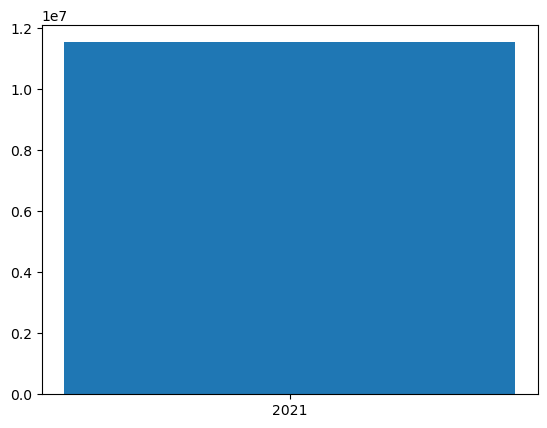

In [11]:
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

# Display the plot
plt.show()

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 14, Finished, Available)

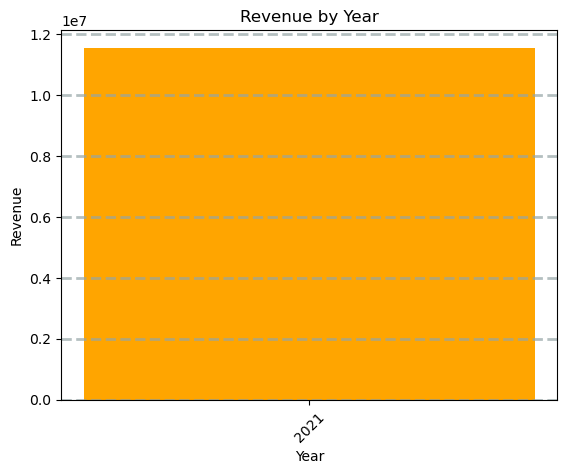

In [12]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 15, Finished, Available)

<Figure size 640x480 with 0 Axes>

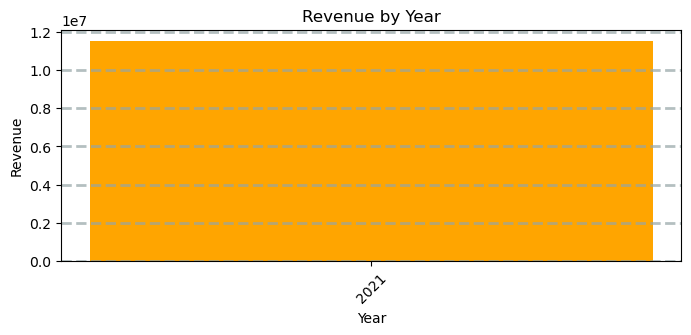

In [13]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 16, Finished, Available)

<Figure size 640x480 with 0 Axes>

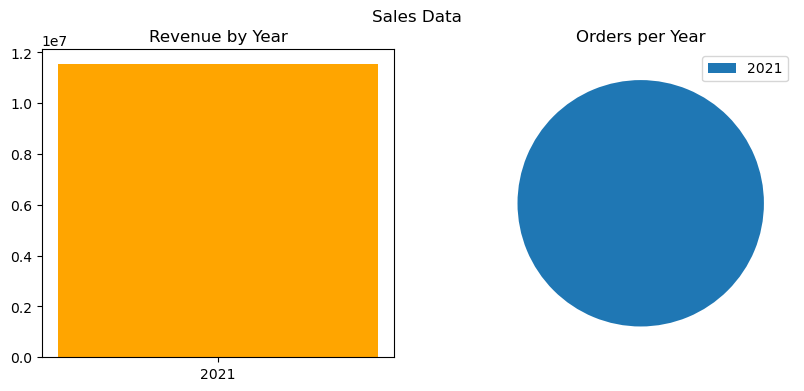

In [14]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')

# Create a pie chart of yearly order counts on the second axis
yearly_counts = df_sales['OrderYear'].value_counts()
ax[1].pie(yearly_counts)
ax[1].set_title('Orders per Year')
ax[1].legend(yearly_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Sales Data')

# Show the figure
plt.show()

**Usar la biblioteca de Seaborn**

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 17, Finished, Available)

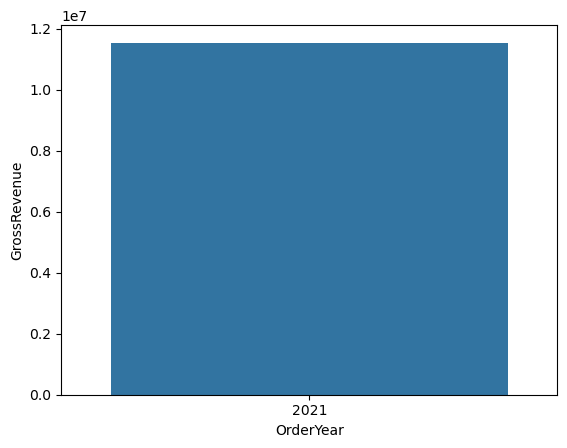

In [15]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 18, Finished, Available)

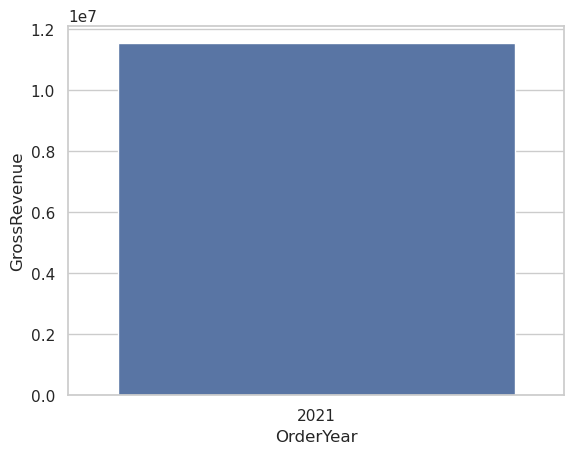

In [16]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

StatementMeta(, faede74e-8fc2-4d37-8846-dc566a41cb66, 19, Finished, Available)

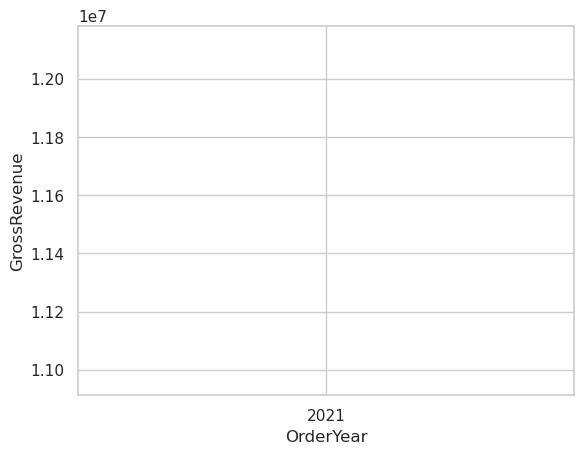

In [17]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a line chart
ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

# Guarde el cuaderno y finalice la sesión de Spark